<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/Random%20Forest%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/version-1/youtube%20spam%20classifier/model.csv'
df = pd.read_csv(url)
#df = pd.read_csv('model.csv')

In [3]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,0,0.265993,0.239773,1.402189,0.000000,1,3.137146,0.0,0,0.0,39.978929,0.200000,0,0,0,0.0,0
1,1,0.327118,0.222346,2.769147,0.000000,1,4.905188,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
2,2,0.433986,0.309582,3.532625,0.032258,1,5.719015,0.0,0,0.0,39.978929,0.064516,0,0,0,0.0,0
3,3,0.201988,0.181141,1.818371,0.000000,1,3.770442,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
4,4,0.176259,0.125743,1.402189,0.000000,1,3.011349,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0


In [4]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'is_spam'],
      dtype='object')

### Standardization

In [5]:
dfc = df.copy()

In [6]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

### Handle imbalance dataset

In [9]:
dfc['is_spam'].value_counts()

0    9823
1     812
Name: is_spam, dtype: int64

In [10]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

X_train = X_train_os
y_train = y_train_os

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 6891, 1: 553})
The number of classes after fit Counter({0: 6866, 1: 6866})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Hyperparameter Tuninng

In [11]:
from sklearn.ensemble import RandomForestClassifier 

In [12]:
rf = RandomForestClassifier()

In [13]:
rf.get_params() # hyperParameter list

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# RandomizedSearchCV for find the most suited model

In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(100,2000,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [17]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [100,
  102,
  104,
  106,
  108,
  110,
  112,
  114,
  116,
  118,
  120,
  122,
  124,
  126,
  128,
  130,
  132,
  134,
  136,
  138,
  140,
  142,
  144,
  146,
  148,
  150,
  152,
  154,
  156,
  158,
  160,
  162,
  164,
  166,
  168,
  170,
  172,
  174,
  176,
  178,
  180,
  182,
  184,
  186,
  188,
  190,
  192,
  194,
  196,
  198,
  200,
  202,
  204,
  206,
  208,
  210,
  212,
  214,
  216,
  218,
  220,
  222,
  224,
  226,
  228,
  230,
  232,
  234,
  236,
  238,
  240,
  242,
  244,
  246,
  248,
  250,
  252,
  254,
  256,
  258,
  260,
  262,
  264,
  266,
  268,
  270,
  272,
  274,
  276,
  278,
  280,
  282,
  284,
  286,
  288,
  290,
  292,
  294,
  296,
  298,
  300,
  302,
  304,
  306,
  308,
  310,
  312,
  314,
  316,
  318,
  320,
  322,
  324,
  326,
  328,
  330,
  332,
  334,
  336,
  338,
  340,
  342,
  344,
  346,
  348,
  350,
  352,
  354,
  356,
  358,
  360,
  362,
  364,
  366,
  368,
  370,
  372,

In [18]:
# rf is the base model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [20]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 77.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 133.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 202.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

### Evaluate

In [21]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1460, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=867,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# get the best model in to instance (for save in disk)
best_model = rf_random.best_estimator_ 

In [23]:
rf_random.best_score_

0.9799017984527119

In [24]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 1460,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 867}

In [48]:
y_pred=rf_random.best_estimator_.predict(X_test)

In [49]:
err = (y_test - y_pred)

In [50]:
err.value_counts()

 0    3065
 1      76
-1      50
Name: is_spam, dtype: int64

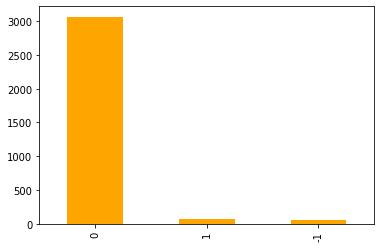

In [52]:
err.value_counts().plot(kind='bar',color='orange')

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.039486054528361014
MSE: 0.039486054528361014
RMSE: 0.198710982405002


Text(0, 0.5, 'Feature Importance Score')

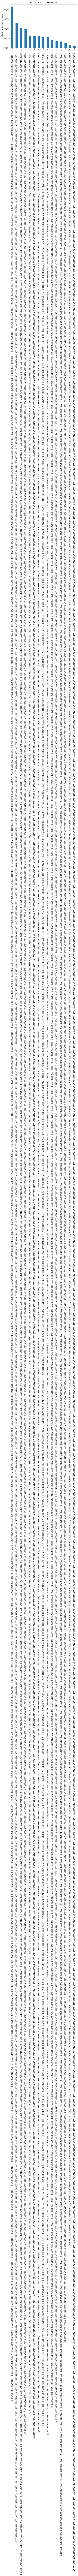

In [54]:
indices=list(X_train)
feat_imp = pd.Series(best_model.feature_importances_, indices).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2882   50]
 [  76  183]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2932
           1       0.79      0.71      0.74       259

    accuracy                           0.96      3191
   macro avg       0.88      0.84      0.86      3191
weighted avg       0.96      0.96      0.96      3191



### ROC & AUC

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [57]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

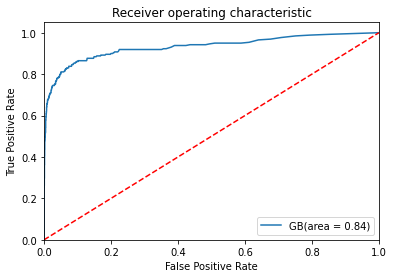

In [58]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Recall - presicion with threshold values

(0.0, 1.0)

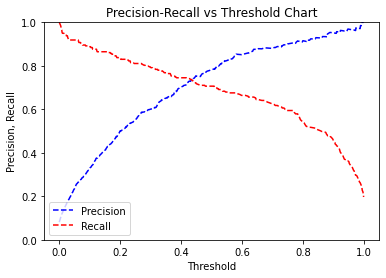

In [59]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

### After evaluate your best model among from all models then you can change the threshold of chosen model as your requirements as below

In [46]:
#THRESHOLD = 0.6
#y_pred = np.where(best_model.predict_proba(X_test.values)[:,1] > THRESHOLD, 1, 0)

In [47]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[[2903   29]
 [  87  172]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2932
           1       0.86      0.66      0.75       259

    accuracy                           0.96      3191
   macro avg       0.91      0.83      0.86      3191
weighted avg       0.96      0.96      0.96      3191



In [ ]:
# we should choose the treshold according to our reqiurement

In [ ]:
# when you go to production mode,
# you should save the model
# you should save the scaler object
# should add your custom threshold value when you predict

In [67]:
import pickle
#open a file, where you ant to store the data
file = open('random_forest_regression_modelv1.pkl', 'wb')
# dump information to that file
pickle.dump(best_model, file)

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
#file = drive.CreateFile({'parents':[{u'id': "https://drive.google.com/drive/u/0/folders/1bgPwYjW2Sz32mFcc7XLfr49Icv9xzW0B"}]})
#file.SetContentFile('random_forest_regression_model.pkl')
#file.Upload() 

In [81]:
#import os
#os.listdir('.')[5]